# SC2001 LAB PROJECT 2

### Greedy Algorithm
Dijkstra algorithm uses greedy algorithm. They are called “greedy” because these algorithms only use the knowledge available at the time, to make the best option, in hopes of reaching the optimal solution. It is simple and efficient, often used in optimization problems like shortest paths or minimum spanning trees. However, it doesn't always guarantee the best overall solution, as it may miss better options by focusing only on immediate benefits.

### Dijkstra Algorithm, what is it, and how it work
Dijkstra algorithm is an algorithm to find the shortest path from a single source vertext to all other vertices in a weighted, directed graph. All weights must be non-negative.

It works by maintaining a set of visited vertices and assigning them the shortest known distance from the source. Initially, all distances are set to infinity, except for the source vertex, which has a distance of 0. At each step, the algorithm selects the unvisited vertex with the smallest known distance, updates the distances of its neighbors, and marks it as visited. This process repeats until all vertices are visited, resulting in the shortest path to each vertex.

# (a) Dijkstra's algorithm with an adjacency matrix and an array-based priority queue. 

## Theoretical Time Complexity for using adjacency matrix, and an array-based priority queue

#### 1. Initialisation:
- We initialise an array *dist* to keep track of the shortest distance to each vertex. This takes $O(|V|)$ time.

#### 2. Extracting the Minimum:
- At each iteration, we need to find the unvisited vertex with the smallest distance. Since we are using an array to simulate the priority queue, finding the minimum vertex takes $O(|V|)$ time.
- There are $|V|$ vertices, so this step is repeated $|V|$ times, giving a total time complexity of $O(|V|^2)$ for this part of the algorithm.

#### 3. Relaxation:
- For each vertex, we look at all other vertices to see if we need to update their distances (i.e., relaxation step). This involves iterating through the row corresponding to the current vertex in the adjacency matrix.
- Each relaxation step takes $O(|V|)$ time because the adjacency matrix has $|V|$ entries per row, and we perform this for every vertex in the graph.
- In total, the relaxation step takes $O(|V|^2) times.

Combining both the **extract minimum** and **relaxation** steps:
- **Extract minimum**: $O(|V|^2)$
- **Relaxation**: $O(|V|^2)$

#### Hence, the total time complexity should be equal to: 
#### $O(|V|^2)$

## Empirical Analysis for using adjacency matrix, and an array-based priority queue

In [18]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random

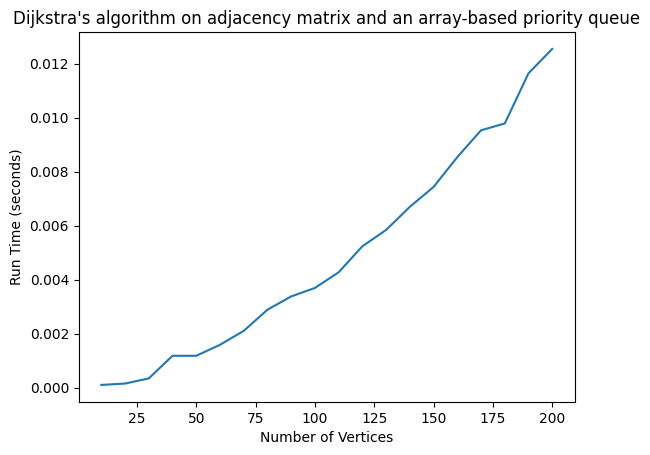

In [19]:
np.random.seed(5)

def generate_random_graph(n):
    graph = np.random.randint(0, 10, size=(n, n))
    graph = np.tril(graph) + np.tril(graph, -1).T
    np.fill_diagonal(graph, 0)
    return graph

def min_distance(d, S, V):
    minDist = float('inf')
    minVertex = 0

    for v in range(V):
        if d[v] < minDist and S[v] == False:
            minDist = d[v]
            minVertex = v

    return minVertex

def dijkstra(adjMatrix, source, target, V):
    d = [float('inf')] * V
    S = [False] * V
    pi = [-1] * V

    d[source] = 0

    for _ in range(V-1):
        u = min_distance(d, S, V)
        S[u] = True

        for v in range(V):
            if adjMatrix[u][v] > 0 and S[v] == False and d[v] > d[u] + adjMatrix[u][v]:
                d[v] = d[u] + adjMatrix[u][v]
                pi[v] = u

    return d[target]

if __name__ == '__main__':
    numVertices = range(10, 210, 10)
    numRepetition = 10
    runTimeArr = []

    for n in numVertices:
        graph = generate_random_graph(n)

        start = time.time()

        for _ in range(numRepetition):
            source, target = np.random.randint(0, n, size=2)
            dijkstra(graph, source, target, n)

        end = time.time()
        aveTime = (end - start) / numRepetition
        runTimeArr.append(aveTime)

    plt.plot(numVertices, runTimeArr)
    plt.xlabel("Number of Vertices")
    plt.ylabel("Run Time (seconds)")
    plt.title("Dijkstra\'s algorithm on adjacency matrix and an array-based priority queue")
    plt.show()

### (B) USING MINIMIZING HEAP FOR PRIORITY QUEUE

### Theoretical Time Complexity for minimizing heap for priority queue

The input graph $G = (V, E)$ we're considering has $|V|$ number of vertices and $|E|$ number of edges.

To analyse theoretical time complexity, we take into account a few things.

#### 1. To enqueue the vertices: $ O (|V|) $
Dijkstra's algorithm maintains a priority queue using the minimzing heap to store and retrieve the vertex with the smallest distance value. Hence, to enqueue all the vertices, it takes $O(|V|)$ time. 

#### 2. To extract the minimum vertex from the heap: $ O (|V| * log|V|) $
We know that the vertex with the smallest distance is placed on top of the heap. Once the element is extracted, the minimising order of the heap has to be restored. For this, the heap has to be traversed to check if the parent nodes are smaller than the children and switching them if not. 

This time complexity is equivalent to the height of the binary tree: $O (log(|V|)) $

Combining this with the number of vertices $|V|$, we have : $O(V * log(|V|))$

#### 3. Relaxing the edges, i.e., updating the shortest distance to a vertex: $O (|E| * log|V|)$
When a shorter distance to a vertex is found, the priority of the vertex has to be updated in the priority queue. This involves the Decrease-key operation, which involves updating the vertex node in the tree and then restoring the minimising heap property. 

This is same as before and is equivalent to: $O (log(|V|)) $

Since this is done once for each of the edges in the heap, we then have $O (|E| * log|V|)$

#### Hence, the total time complexity should be equal to: 
#### $O((|V| * log|V|) + (|E| * log|V|)) = O((|V|+|E|) * log |V|) $